In [2]:
import lsst.daf.persistence as dafPersist

In [3]:
butler = dafPersist.Butler(inputs='DATA/rerun/coaddForcedPhot')

In [4]:
rSources = butler.get('deepCoadd_forced_src', {'filter': 'HSC-R', 'tract': 0, 'patch': '1,1'})
iSources = butler.get('deepCoadd_forced_src', {'filter': 'HSC-I', 'tract': 0, 'patch': '1,1'})

In [5]:
iSources.getSchema().find('base_PsfFlux_flux').field.getUnits()

'count'

In [6]:
rCoaddCalib = butler.get('deepCoadd_calexp_calib',  {'filter': 'HSC-R', 'tract': 0, 'patch': '1,1'})
iCoaddCalib = butler.get('deepCoadd_calexp_calib',  {'filter': 'HSC-I', 'tract': 0, 'patch': '1,1'})

In [7]:
rCoaddCalib.setThrowOnNegativeFlux(False)
iCoaddCalib.setThrowOnNegativeFlux(False)

rMags = rCoaddCalib.getMagnitude(rSources['base_PsfFlux_flux'])
iMags = iCoaddCalib.getMagnitude(iSources['base_PsfFlux_flux'])

In [8]:
deblended = rSources['deblend_nChild'] == 0

In [9]:
refTable = butler.get('deepCoadd_ref', {'filter': 'HSC-R^HSC-I', 'tract': 0, 'patch': '1,1'})

In [10]:
inInnerRegions = refTable['detect_isPatchInner'] & refTable['detect_isTractInner']

In [11]:
isPrimary = refTable['detect_isPrimary']

In [12]:
rMags[isPrimary]
iMags[isPrimary]

array([ 23.46074718,  23.0139567 ,  24.59960059, ...,  27.74281934,
        30.32856837,  24.70842436])

In [13]:
iSources.schema.find('base_ClassificationExtendedness_value').field.getDoc()

'Set to 1 for extended sources, 0 for point sources.'

In [14]:
isStellar = iSources['base_ClassificationExtendedness_value'] < 1.

In [15]:
iSources.getSchema().extract('base_PsfFlux_*')

{'base_PsfFlux_flag_badCentroid': SchemaItem(key=Key['Flag'](offset=64, bit=6), field=Field['Flag'](name="base_TransformedCentroid_flag", doc="whether the reference centroid is marked as bad")),
 'base_PsfFlux_flux': SchemaItem(key=Key<D>(offset=584, nElements=1), field=Field['D'](name="base_PsfFlux_flux", doc="flux derived from linear least-squares fit of PSF model", units="count")),
 'base_PsfFlux_fluxSigma': SchemaItem(key=Key<D>(offset=592, nElements=1), field=Field['D'](name="base_PsfFlux_fluxSigma", doc="1-sigma flux uncertainty", units="count")),
 'base_PsfFlux_area': SchemaItem(key=Key<F>(offset=600, nElements=1), field=Field['F'](name="base_PsfFlux_area", doc="effective area of PSF", units="pixel")),
 'base_PsfFlux_flag': SchemaItem(key=Key['Flag'](offset=576, bit=7), field=Field['Flag'](name="base_PsfFlux_flag", doc="General Failure Flag")),
 'base_PsfFlux_flag_noGoodPixels': SchemaItem(key=Key['Flag'](offset=576, bit=8), field=Field['Flag'](name="base_PsfFlux_flag_noGoodPixe

In [16]:
isGoodFlux = ~iSources['base_PsfFlux_flag']

In [17]:
selected = isPrimary & isStellar & isGoodFlux

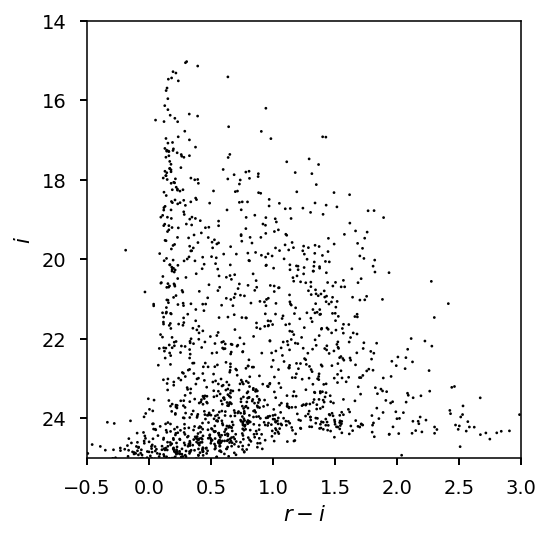

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')
plt.figure(1, figsize=(4, 4), dpi=140)
plt.scatter(rMags[selected] - iMags[selected],
            iMags[selected],
            edgecolors='None', s=2, c='k')
plt.xlim(-0.5, 3)
plt.ylim(25, 14)
plt.xlabel('$r-i$')
plt.ylabel('$i$')
plt.subplots_adjust(left=0.125, bottom=0.1)
plt.show()